In [4]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df.fillna('Na',inplace=True)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
# 대륙마다 국가의 갯수
df['continent'].value_counts()

In [10]:
# AF대륙에 속하는 국가의 맥주 소비량을 출력하시오
df['continent'] =="AF"
df[df['continent'] =="AF"][['country','beer_servings']].head()

,country,beer_servings
2,Algeria,25
4,Angola,217
18,Benin,34
22,Botswana,173
26,Burkina Faso,25


In [8]:
# 대륙별 평균 wine_servings
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
Na     24.521739
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [6]:
# 대륙간 맥주 소비량
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
Na    3345
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [11]:
# 두 자료의 상관관계, beer 1증가시 wine의 증가량
df[['beer_servings','wine_servings']].corr(method='pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [12]:
# 4개 모두 상관관계 행렬 구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [13]:
# 대륙별 맥주소비량, 와인소비량 평균, 최소, 최대, 합계

# 맥주 소비량이 가장 높은 대륙은 ?

# 막대그래프 대륙별 맥주소비량 그래프로 구현

In [14]:
# 대륙별 맥주소비량, 와인소비량 평균, 최소, 최대, 합계
df.groupby('continent')['beer_servings'].agg(['mean','min','max','sum'])
# df.groupby('grade')['total'].agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
Na,145.434783,1,285,3345
OC,89.687500,0,306,1435
SA,175.083333,93,333,2101


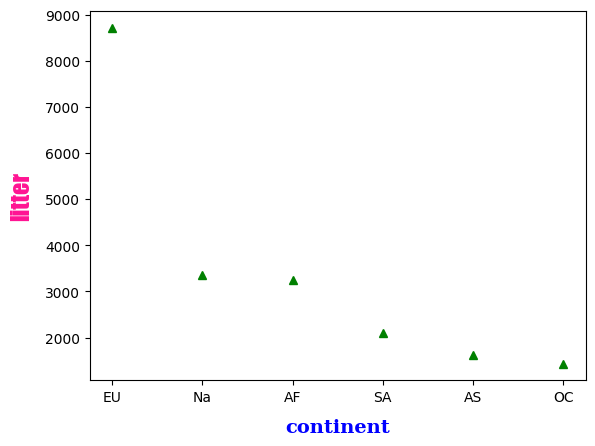

In [26]:
# 맥주 소비량이 가장 높은 대륙은 ?

x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

# 막대그래프 대륙별 맥주소비량 그래프로 구현
import matplotlib.pyplot as plt
font1 = {'family': 'serif',
         'color': 'b',
         'weight': 'bold',
         'size': 14
         }

font2 = {'family': 'fantasy',
         'color': 'deeppink',
         'weight': 'normal',
         'size': 'xx-large'
         }

plt.xlabel('continent',labelpad=10, fontdict=font1)
plt.ylabel('litter',labelpad=10, fontdict=font2)

plt.plot(x,y,'g^') # plot선형
# plt.bar(x,y) # bar막대


In [32]:
# AF, EU 맥주 소비량 차이
df.groupby('continent')['beer_servings'].sum()
beer_AF = df[df['continent']=='AF']['beer_servings'].sum()
beer_EU = df[df['continent']=='EU']['beer_servings'].sum()
beer_EU-beer_AF

5462

In [33]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df.fillna('Na',inplace=True)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [34]:
# 컬럼의 모든 술의 총량 출력
# total_servings
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


<BarContainer object of 5 artists>

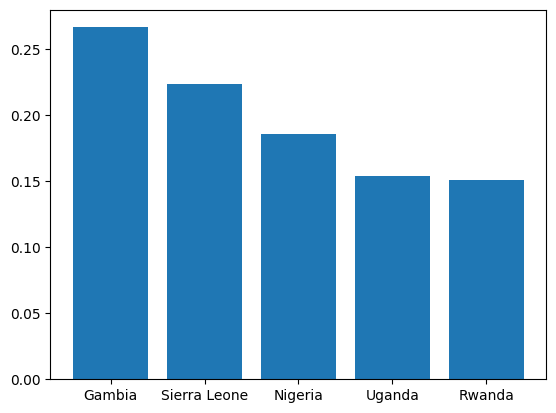

In [41]:
# 술 소비량 대비 알콜 비율이 어느정도 되는가
df['total_litres_of_pure_alcohol']/df['total_servings']
# alcohol_rate 컬럼을 추가해서 정렬
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']
# 나라별로 역순정렬, 20개 출력
df.sort_values('alcohol_rate',ascending=False).head(20)

# 막대그래프로 출력
import matplotlib.pyplot as plt
import numpy as np
dfx = df.sort_values('alcohol_rate',ascending=False).head(5)['country']
dfy = df.sort_values('alcohol_rate',ascending=False).head(5)['alcohol_rate']

# dfx = df['EMP_NAME'].head()
# dfy = df['SALARY'].head()

plt.bar(dfx,dfy)